In [1]:
import keras 

# VGGNet 모델 로드(사전 학습된 모델 - 백만개 이미지, 1000개 클래스)
vggnet = keras.applications.VGG16()

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 24s 0us/step


In [2]:
vggnet.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

In [3]:
!pip install pillow

In [4]:
# dog.png 이미지 가져오기 
from PIL import Image

dog_png = Image.open("images/dog.png")

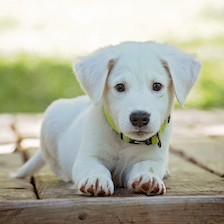

In [5]:
display(dog_png)

In [9]:
# 사전 학습된 모델마다 전처리 방법이 다르다.
import numpy as np
from keras.applications import vgg16
vgg_dog = vgg16.preprocess_input(np.array(dog_png))
#vgg_dog = vgg_dog.reshape(1, 224, 224, 3)
vgg_dog = vgg_dog[np.newaxis, :]
vgg_dog.shape

(1, 224, 224, 3)

In [12]:
predictions = vggnet.predict(vgg_dog)
#np.round(predictions, decimals=3)
index = np.argmax(predictions, axis=1)
index

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


array([208])

In [13]:
vgg16.decode_predictions(predictions) # 이미지넷 1000개 클래스 항목으로 출력

35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


[[('n02099712', 'Labrador_retriever', np.float32(0.35698158)),
  ('n02099601', 'golden_retriever', np.float32(0.14486563)),
  ('n02104029', 'kuvasz', np.float32(0.09278689)),
  ('n02111500', 'Great_Pyrenees', np.float32(0.06916979)),
  ('n02106166', 'Border_collie', np.float32(0.056728635))]]

In [14]:
vgg16.decode_predictions(predictions, top=2)

[[('n02099712', 'Labrador_retriever', np.float32(0.35698158)),
  ('n02099601', 'golden_retriever', np.float32(0.14486563))]]

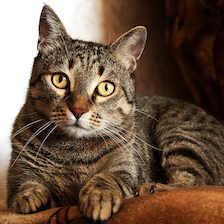

In [15]:
# 고양이 이미지 가져오기 
cat_png = Image.open("images/cat.png")

display(cat_png)

In [16]:
vgg_cat = vgg16.preprocess_input(np.array(cat_png))

In [17]:
vgg_cat = vgg_cat[np.newaxis,:]
vgg_cat.shape

(1, 224, 224, 3)

In [19]:
predictions = vggnet.predict(vgg_cat)
vgg16.decode_predictions(predictions, top=3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


[[('n02123045', 'tabby', np.float32(0.43275306)),
  ('n02124075', 'Egyptian_cat', np.float32(0.31128028)),
  ('n02123159', 'tiger_cat', np.float32(0.21606463))]]